# Проект: Выбор локации для скважины

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подготовка данных</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li></ul></div>

**Описание проекта**

Я работаю в добывающей компании «ГлавРосГосНефть» (название вымышленное). Компании нужно решить, где бурить новую скважину.

Мне предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Нужно проанализировать возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Описание данных**

Файлы с данными:
- `geo_data_0.csv` - данные из первого региона;
- `geo_data_1.csv` - данные из второго региона;
- `geo_data_2.csv` - данные из третьего региона.

Колонки в данных:
- `id` — уникальный идентификатор скважины;
- `f0`, `f1`, `f2` — три признака точек;
- `product` — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

### Импорт библиотек

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Загрузка данных

Нам дано 3 датасета по трём регионам, по одному региону в каждом датасете. Откроем и посмотрим на них:

In [2]:
df_1 = pd.read_csv('/datasets/geo_data_0.csv')
df_2 = pd.read_csv('/datasets/geo_data_1.csv')
df_3 = pd.read_csv('/datasets/geo_data_2.csv')

Для удобства, создадим функцию для просмотра информации:

In [3]:
def df_info(df):
    print('DataFrame:')
    display(df.head(10))
    print('--------------------------------------------------')
    print('Info:')
    print(df.info())
    print('--------------------------------------------------')
    print('Describe:')
    display(df.describe())
    print('--------------------------------------------------')
    print('Correlation:')
    display(df.corr())

In [4]:
df_info(df_1)

DataFrame:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


--------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
--------------------------------------------------
Describe:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


--------------------------------------------------
Correlation:


,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [5]:
df_info(df_2)

DataFrame:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


--------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
--------------------------------------------------
Describe:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


--------------------------------------------------
Correlation:


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [6]:
df_info(df_3)

DataFrame:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


--------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
--------------------------------------------------
Describe:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


--------------------------------------------------
Correlation:


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


На первый взгляд видно:
- пропусков в данных не наблюдается;
- колонка "id" будет лишняя для модели, так как на котегории её не разобрать и полезной информации она не даст, а скорее запутает модель;
- высокой корреляции между фичами не наблюдается;
- наблюдается довольно высокие корреляции между колонками "f2" и "product", особенно во второй таблице, но это скорее плюс для предсказаний модели.

Посмотрим на эти корреляции:

In [7]:
def plt_corr(df, name):
    df.plot(kind='hexbin', x='f2', y='product', gridsize=40, title=name, sharex=False, figsize=(10, 8))
    plt.show()

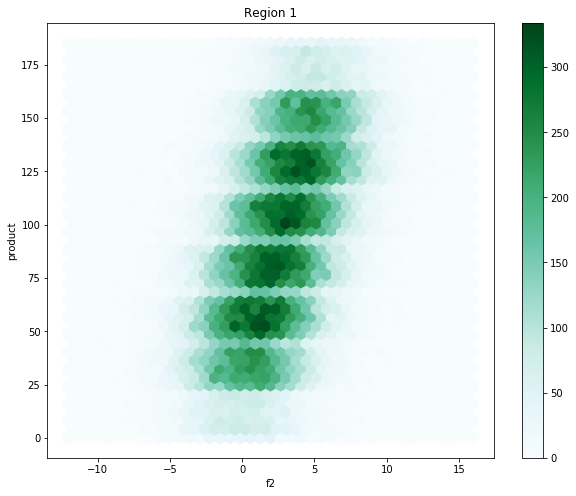

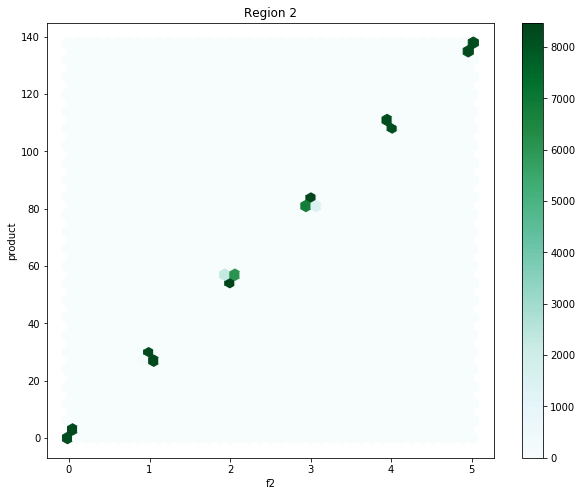

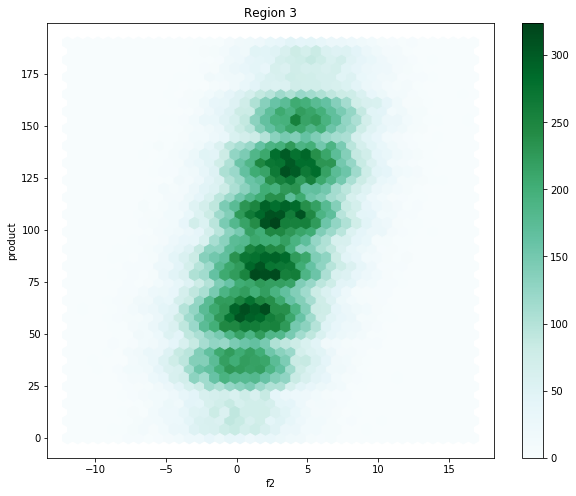

In [8]:
plt_corr(df_1, 'Region 1')
plt_corr(df_2, 'Region 2')
plt_corr(df_3, 'Region 3')

### Подготовка данных

Для начала дропнем колонки с id объектов, так как они нам не нужны:

In [9]:
df_1 = df_1.drop(['id'], axis=1)
df_2 = df_2.drop(['id'], axis=1)
df_3 = df_3.drop(['id'], axis=1)

In [10]:
df_1.head()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


In [11]:
df_2.head()

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


In [12]:
df_3.head()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


Теперь разделим датасеты на фичи и целевые признаки. И сразу разделим их на обучающие и валидационные выборки в соотношении 75/25.

Создадим функцию которая будет производить все необходимые действия:

In [13]:
def df_split(df):
    global target_train, features_train, target_valid, features_valid
    target = df['product']
    features = df.drop(['product'], axis=1)
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=.25, random_state=555)

Применим функцию и назначим получившиеся выборки:

In [14]:
df_split(df_1)
features_train_df_1, features_valid_df_1 = features_train, features_valid
target_train_df_1, target_valid_df_1 = target_train, target_valid

In [15]:
df_split(df_2)
features_train_df_2, features_valid_df_2 = features_train, features_valid
target_train_df_2, target_valid_df_2 = target_train, target_valid

In [16]:
df_split(df_3)
features_train_df_3, features_valid_df_3 = features_train, features_valid
target_train_df_3, target_valid_df_3 = target_train, target_valid

Посмотрим, что получилось:

In [17]:
print('Features 1:', features_train_df_1.shape, features_valid_df_1.shape)
print('Targets 1:', target_train_df_1.shape, target_valid_df_1.shape)
print('---------------------------------')
print('Features 2:', features_train_df_2.shape, features_valid_df_2.shape)
print('Targets 2:', target_train_df_2.shape, target_valid_df_2.shape)
print('---------------------------------')
print('Faetures 3:', features_train_df_3.shape, features_valid_df_3.shape)
print('Targets 3:', target_train_df_3.shape, target_valid_df_3.shape)

Features 1: (75000, 3) (25000, 3)
Targets 1: (75000,) (25000,)
---------------------------------
Features 2: (75000, 3) (25000, 3)
Targets 2: (75000,) (25000,)
---------------------------------
Faetures 3: (75000, 3) (25000, 3)
Targets 3: (75000,) (25000,)


Разделение прошло успешно. Можно обучать модели.

## Обучение и проверка модели

Обучим модель "Линейная регрессия", проверим на валидационных выборках, посмотрим на результаты и сразу проверим на адекватность предсказаний. Создадим функцию для этих действий:

In [18]:
def fit_and_check(region, df_features_train, df_features_valid, df_target_train, df_target_valid):
    
    global rmse, predictions_mean, predictions_reg
    
    model = LinearRegression().fit(df_features_train, df_target_train)
    predictions = model.predict(df_features_valid)
    predictions_mean = predictions.mean().round(2)
    rmse = ((mean_squared_error(df_target_valid, predictions)) ** 0.5).round(2)
    score = (r2_score(df_target_valid, predictions)).round(2)
    
    print(region)
    print('-----------------------------------------')
    print('Предсказания модели:')
    print('Средний запас предсказанного сырья:', predictions_mean)
    print('RMSE:', rmse)
    print('R2-score:', score)
    
    predicted_valid = pd.Series(df_target_train.mean(), index=df_target_valid)
    mean_true = df_target_train.mean().round(2)
    rmse_true = ((mean_squared_error(df_target_valid, predicted_valid)) ** 0.5).round(2)
    
    print('-----------------------------------------')
    print('Mean:')
    print('Средний запас сырья:', mean_true)
    print('RMSE:', rmse_true)
    
    predictions_reg = pd.Series(predictions, index=df_target_valid.index)

Теперь проведём исследования и сохраним результаты:

In [19]:
fit_and_check(
    'Регион 1:', features_train_df_1, features_valid_df_1,
    target_train_df_1, target_valid_df_1)
rmse_reg_1, predictions_reg_1, predictions_mean_reg_1 = rmse, predictions_reg, predictions_mean

Регион 1:
-----------------------------------------
Предсказания модели:
Средний запас предсказанного сырья: 92.61
RMSE: 37.55
R2-score: 0.28
-----------------------------------------
Mean:
Средний запас сырья: 92.54
RMSE: 44.25


In [20]:
fit_and_check(
    'Регион 2:', features_train_df_2, features_valid_df_2,
    target_train_df_2, target_valid_df_2)
rmse_reg_2, predictions_reg_2, predictions_mean_reg_2 = rmse, predictions_reg, predictions_mean

Регион 2:
-----------------------------------------
Предсказания модели:
Средний запас предсказанного сырья: 68.85
RMSE: 0.89
R2-score: 1.0
-----------------------------------------
Mean:
Средний запас сырья: 68.82
RMSE: 46.01


In [21]:
fit_and_check(
    'Регион 3:', features_train_df_3, features_valid_df_3,
    target_train_df_3, target_valid_df_3)
rmse_reg_3, predictions_reg_3, predictions_mean_reg_3 = rmse, predictions_reg, predictions_mean

Регион 3:
-----------------------------------------
Предсказания модели:
Средний запас предсказанного сырья: 95.07
RMSE: 40.11
R2-score: 0.2
-----------------------------------------
Mean:
Средний запас сырья: 94.98
RMSE: 44.9


Выведем результаты в таблице:

In [22]:
result = {
    'predictions_mean': [predictions_mean_reg_1, predictions_mean_reg_2, predictions_mean_reg_3],
    'rmse_score': [rmse_reg_1, rmse_reg_2, rmse_reg_3]
}
results = pd.DataFrame(data=result, index=('region 1', 'region 2', 'region 3'))
results

,predictions_mean,rmse_score
region 1,92.61,37.55
region 2,68.85,0.89
region 3,95.07,40.11


Получилось, что модель во втором регионе лучше остальных справилась с предсказаниями, но и остальные тоже показали неплохие результаты.

Но не смотря на почти идеальные предсказания, во втором регионе наблюдаются самые низкие средние запасы сырья. Самые высокие средние запасы оказались в третьем регионе.

## Подготовка к расчёту прибыли

Посчитаем сколько необходимо запасов сырья для рентабильности разработки и сравним со средними запасами в регионах:

In [23]:
budget = 10e9
barrel_revenue = 450e3

In [24]:
print('Необходимый запас для безубыточности разработки:', budget / barrel_revenue / 200)
print('Средний запас сырья в регионе 1:', df_1['product'].mean())
print('Средний запас сырья в регионе 2:', df_2['product'].mean())
print('Средний запас сырья в регионе 3:', df_3['product'].mean())

Необходимый запас для безубыточности разработки: 111.11111111111111
Средний запас сырья в регионе 1: 92.50000000000001
Средний запас сырья в регионе 2: 68.82500000000002
Средний запас сырья в регионе 3: 95.00000000000004


Получается, что средних значений по запасам не достаточно для разработки, а это значит, что нужно искать лучшие места для разработки. В этом нам и должны помочь наши обученные модели.

## Расчёт прибыли и рисков 

Создадим функцию для расчёта прибыли:

Каждую выборку отсортируем в порядке убывания сырья и возьмём 200 самых прибыльных.\
Посчитаем сумму целевых значений объёма сырья, соответствующее этим предсказаниям.\
Рассчитаем прибыль для полученного объёма сырья.

In [25]:
def profit(predict, target):
    predictions_best_200 = predict.sort_values(ascending=False)
    target_best_200 = target[predictions_best_200.index][:200]
    rev = sum(target_best_200) * barrel_revenue - budget
    return rev

Теперь создадим функцию для расчёта риска и прибыли для каждого региона:

Применим метод "Бутстреп" с 1000 выборок по 500 точек в каждой.\
Найдём среднюю прибыль, 95% доверительный интервал и риск убытков.\
Сохраним результаты.

In [26]:
def bootstrap(prediction, target):
    
    state = np.random.RandomState(555)
    results = []
    global final_reg
    
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        prediction_subsample = prediction[target_subsample.index]
        results.append(profit(prediction_subsample, target_subsample))
    
    results = pd.Series(results)    
    results_mean = (results.mean() / 1e6).round(2)

    lower = (results.quantile(.025) / 1e6).round(2)
    upper = (results.quantile(.975) / 1e6).round(2)
    
    risk = (results < 0).mean() * 100
    
    final_reg = {
        'mean in mln.': results_mean,
        'lower in mln.': lower,
        'upper in mln.': upper,
        'risk': '{0:.1f}%'.format(risk)
    }

In [27]:
bootstrap(predictions_reg_1, target_valid_df_1)
final_reg_1 = final_reg

In [28]:
bootstrap(predictions_reg_2, target_valid_df_2)
final_reg_2 = final_reg

In [29]:
bootstrap(predictions_reg_3, target_valid_df_3)
final_reg_3 = final_reg

In [30]:
results_final = final_reg_1, final_reg_2, final_reg_3
results = pd.DataFrame(data=results_final, index=('region 1', 'region 2', 'region 3'))
results

,mean in mln.,lower in mln.,upper in mln.,risk
region 1,457.20,-87.54,991.81,5.0%
region 2,517.12,88.64,925.03,0.9%
region 3,398.62,-142.11,941.88,9.7%


Таким образом получилось, что второй регион самый подходящий для разработки в тех местах, которая предложила модель. Там самый низкий риск убытков, самая высокая средняя прибыль и наименее доходные места не уходят в убыток.